<a href="https://colab.research.google.com/github/Dong-Gi-Kang/Tools/blob/master/Birch_Murnaghan_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is EOS-fit.py
Volume or lattice spacing (vol/latt) [default=vol]: 
Volume units (ang3/bohr3) [default=ang3]: 
Energy units (eV/Ry/Ha) [default=eV]: 
Murnaghan : E0 = -51122.711717 eV
Murnaghan : B0 = 15486.028464 GPa
Murnaghan : Bp = 4.000000
Murnaghan : V0 = 23.572690 angstrom^3
Birch-Murnaghan : E0 = -51122.711717 eV
Birch-Murnaghan : B0 = 15486.028464 GPa
Birch-Murnaghan : Bp = 4.000000
Birch-Murnaghan : V0 = 23.572690 angstrom^3
Birch : E0 = -51122.711717 eV
Birch : B0 = 15486.028464 GPa
Birch : Bp = 4.000000
Birch : V0 = 23.572688 angstrom^3
Vinet : E0 = -51122.711716 eV
Vinet : B0 = 15486.028464 GPa
Vinet : Bp = 4.000000
Vinet : V0 = 23.572689 angstrom^3
Do you want to plot the result (yes/no) [default=yes]: 


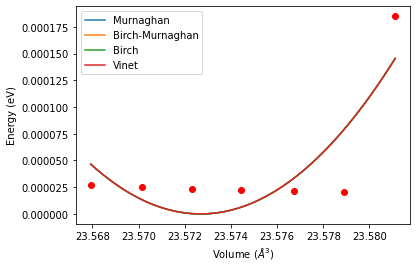

In [1]:
# non-linear fitting/regression
import sys
import math
import numpy as np
from scipy.optimize import leastsq


# Murnaghan equation of state
def eos_murnaghan(params, vol):
    'From Phys. Rev. B 28, 5480 (1983)'
    E0, B0, Bp, V0 = params 
    E = E0 + B0/Bp * vol * ((V0/vol)**Bp/(Bp-1.0)+1.0) - V0*B0/(Bp-1.0)
    return E

# Birch-Murnaghan equation of state
def eos_birch_murnaghan(params, vol):
    'From Phys. Rev. B 70, 224107'
    E0, B0, Bp, V0 = params 
    eta = (vol/V0)**(1.0/3.0)
    E = E0 + 9.0*B0*V0/16.0 * (eta**2-1.0)**2 * (6.0 + Bp*(eta**2-1.0) - 4.0*eta**2)
    return E

# Birch equation of state
def eos_birch(params, vol):
    
    'From Intermetallic compounds: Principles and Practice, Vol. I: Princples' 
    'Chapter 9 pages 195-210 by M. Mehl. B. Klein, D. Papaconstantopoulos'
    
    E0, B0, Bp, V0 = params 
    E = (E0 + 9.0/8.0*B0*V0*((V0/vol)**(2.0/3.0) - 1.0)**2
            + 9.0/16.0*B0*V0*(Bp-4.)*((V0/vol)**(2.0/3.0) - 1.0)**3)
    return E

# Vinet equation of state
def eos_vinet(params, vol):
    'From Phys. Rev. B 70, 224107'
    E0, B0, Bp, V0 = params 
    eta = (vol/V0)**(1.0/3.0)
    E = E0 + 2.0*B0*V0/(Bp-1.0)**2 * \
        (2.0 - (5.0 + 3.0*Bp*(eta-1.0) - 3.0*eta)*np.exp(-3.0*(Bp-1.0)*(eta-1.0)/2.0))
    return E


# Customized input with default and accepted values
def myinput(prompt, default, accepted):
    while True:
        res = input(prompt + " [default=%s]: " % (default))
        if res == '': res = default
        if res in accepted:
            break
        else:
            print ("accepted values:", accepted)
    return res

# Note!
# If you want to run this code in your own server please delete the comment (''') in below
# and eliminate the prepared numpy array (right below of the #further questions)


print ("This is EOS-fit.py")

'''
#fname = input("Filename containing energy vs volume [volume.dat]: ")
#if fname == '': fname = 'volume.dat'

#try:
#    f = open(fname, 'rt')
#except IOError:
#    sys.stderr.write("Error opening or reading file %s\n" % (fname))
#    sys.exit(1)

# read data from file
#print

print ("Data read from file:")
#vol = []
#ene = []

#while True:
#    line = f.readline().strip()
#    if line == '': break
#    if line[0] == '#' or line[0] == '!': continue
#    v, e = [float(x) for x in line.split()[:2]]
#    vol.append(v)
#    ene.append(e)
#    print (v, e)
#print
#f.close()

# transform to numpy arrays
#vol = np.array(vol)
#ene = np.array(ene)
'''

# further questions
'''
'aims_bct'
vol = np.array([98.831319357,    98.837948999,    98.844578928,    98.851209142,    
                98.857839641,    98.864470427,    98.871101498,    98.877732855,    
                98.884364498,    98.890996427,    98.897628641])
ene = np.array([-204490.644285550,       -204490.644287664,       -204490.644289450,       
                -204490.644290764,       -204490.644291638,       -204490.644291241,       
                -204490.644291312,       -204490.644290962,       -204490.644290199,       
                -204490.644289030,       -204490.644287501])
'''
'''
'aims_cscl_2'
vol = np.array([18.80372551,     18.80584697,     18.80796858,     18.81009035,     18.81221228,     18.81433438,     18.81568741])
ene = np.array([-51121.360656328,        -51121.360659081,        -51121.360661519,        
                -51121.360663712,        -51121.360665648,        -51121.360667253,        
                -51121.360668649])
'''
'''
'aims_hx_2'
vol = np.array([47.203094000,    47.206919000,    47.210750000,    47.213749000,    
                47.218402000,    47.222227000,    47.226056000])
ene = np.array([-102245.450086539,       -102245.450089381,       -102245.450091932,       
                -102245.450093653,       -102245.450096172,       -102245.450097869,       
                -102245.450099269])
'''
'''
'aims_rock_2'
vol = np.array([19.370634,       19.376418,       19.380275,       19.382257,       19.384131,       19.38606,        19.38799, 19.389918])
ene = np.array([-51122.505947274,        -51122.505950280,        -51122.505951134,        
                -51122.505951212,        -51122.505951083,        -51122.505950724,        
                -51122.505950137,        -51122.505949311])
'''
'aims_zincblende'
vol = np.array([23.567928,       23.570125,       23.57232,        23.57445,        
                23.576715,       23.578916,       23.581112])
ene = np.array([-51122.711689671,        -51122.711691343,        -51122.711692831,        
                -51122.711694019,        -51122.711695199,        -51122.711696137,        
                -51122.711531622])

'''
'aims_cscl'
vol = np.array([19.617463914,    19.639293434,    19.661139141,    19.683001043,    
                19.704879145,    19.726773453,    19.748683973])
ene = np.array([-51121.318267214,        -51121.316969524,        -51121.315649404,        
                -51121.314307486,        -51121.312943533,        -51121.311557493,        
                -51121.310149670])
'''
'''
'aims_hx'
vol = np.array([52.59687657,     52.90669758,     53.33441292,     53.76440821,     54.19668943,     54.5122169])
ene = np.array([-102245.2071,    -102245.2054,    -102245.2008,    -102245.1935,    -102245.1834,    -102245.1707])
'''

'''
'aims_rocksalt'
vol = np.array([26.48224522,     26.50890788,     26.56228688,     26.58900323,     
                26.61573749,     26.64248966])
ene = np.array([-51122.49203,    -51122.49284,    -51122.49439,    -51122.49513,    
                -51122.49584,    -51122.49653])
'''

'''
'aims_sodalite'
vol = np.array([176.1339487,     176.2282304,     176.3225458,     176.4168948,     
                176.5112774,     176.6056937,     176.7001437])
ene = np.array([-306735.2565,    -306735.2556,    -306735.2548,    -306735.2539,    
                -306735.2529,    -306735.252,     -306735.2509])
'''
'''
'aims_wurtzite'
vol = np.array([54.78166821,     54.82596937,     54.87029391,     54.91464185,     
                54.95901319,     55.00340793,    55.04782609])
ene = np.array([-102245.449,     -102245.4488,    -102245.4486,    -102245.4484,    
                -102245.4481,    -102245.4478,    -102245.4475])
'''
'''
'aims_zincblende'
vol = np.array([])
ene = np.array([])
'''

is_volume = True
ans = myinput("Volume or lattice spacing (vol/latt)", "vol", ["vol", "latt"])
is_volume = (ans == 'vol')

if is_volume:
    vol_unit = myinput("Volume units (ang3/bohr3)", "ang3", ["ang3", "bohr3"])    
    if vol_unit == "bohr3": vol *= 0.14818471    # convert to angstrom^3
else:
    vol_unit = myinput("Lattice units (ang/bohr)", "ang", ["ang", "bohr"])    
    if vol_unit == "bohr": vol *= 0.52917721     # convert to angstrom
    latt = myinput("Lattice type (sc/fcc/bcc)", "sc", ["sc", "bcc", "fcc"])
    fact = 1.0
    if latt == "fcc": fact = 0.25
    if latt == "bcc": fact = 0.5
    # lattice to volume
    vol = fact * vol**3

ene_unit = myinput("Energy units (eV/Ry/Ha)", "eV", ["eV", "Ry", "Ha"])
if ene_unit == "Ry": ene *= 13.605692            # convert to eV
if ene_unit == "Ha": ene *= 27.211383            # convert to eV
print

# fit a parabola to the data and get inital guess for equilibirum volume
# and bulk modulus
a, b, c = np.polyfit(vol, ene, 2)
V0 = -b/(2*a)
E0 = a*V0**2 + b*V0 + c
B0 = 2*a*V0
Bp = 4.0

# initial guesses in the same order used in the Murnaghan function
x0 = [E0, B0, Bp, V0]

def print_params(label, params):
    E0, B0, Bp, V0 = params
    print (label, ": E0 = %f eV" % (E0))
    print (label, ": B0 = %f GPa" % (B0*160.21765))
    print (label, ": Bp = %f" % (Bp))
    print (label, ": V0 = %f angstrom^3" % (V0))
    #print

# fit the equations of state
target = lambda params, y, x: y - eos_murnaghan(params, x)
murn, ier = leastsq(target, x0, args=(ene,vol))
print_params("Murnaghan", murn)

target = lambda params, y, x: y - eos_birch_murnaghan(params, x)
birch_murn, ier = leastsq(target, x0, args=(ene,vol))
print_params("Birch-Murnaghan", birch_murn)

target = lambda params, y, x: y - eos_birch(params, x)
birch, ier = leastsq(target, x0, args=(ene,vol))
print_params("Birch", birch)

target = lambda params, y, x: y - eos_vinet(params, x)
vinet, ier = leastsq(target, x0, args=(ene,vol))
print_params("Vinet", vinet)


try:
    import pylab
except ImportError:
    sys.stderr.write("pylab module non available, skipping plot")
    sys.exit(0)

# plotting 
ans = myinput("Do you want to plot the result (yes/no)", "yes", ["yes", "no"])
if ans == "no": sys.exit(0)

import pylab
vfit = np.linspace(min(vol),max(vol),100)

pylab.plot(vol, ene-E0, 'ro')
pylab.plot(vfit, eos_murnaghan(murn,vfit)-E0, label='Murnaghan')
pylab.plot(vfit, eos_birch_murnaghan(birch_murn,vfit)-E0, label='Birch-Murnaghan')
pylab.plot(vfit, eos_birch(birch,vfit)-E0, label='Birch')
pylab.plot(vfit, eos_vinet(vinet,vfit)-E0, label='Vinet')
pylab.xlabel('Volume ($\AA^3$)')
pylab.ylabel('Energy (eV)')
pylab.legend(loc='best')
pylab.show()
quit()

----
----
#Trial
---
---


Fitted parameters = [-155.72552021   -0.84801059   -0.9126034    69.14925593]


NameError: ignored

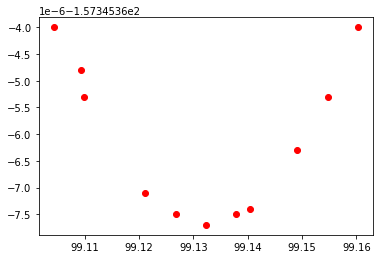

In [ ]:
from scipy.optimize import leastsq
import numpy as np

#ZnO Wurtzite
vols = np.array([99.160335, 99.154735, 99.149136, 99.140469, 99.137937, 99.132338, 99.12674, 99.121141, 99.109408, 99.109944, 99.104346])
energies = np.array([-157.345364, -157.3453653, -157.3453663, -157.3453674, -157.3453675, -157.3453677, -157.3453675, -157.3453671, -157.3453648, -157.3453653, -157.345364])
#energies = np.array([-0.98207253,     -0.98207253,     -0.98207254,     -0.98207255,     -0.98207255,     -0.98207255,     -0.98207255,     -0.98207254,         -0.98207253,     -0.98207253,     -0.98207253])
def Birch_Murnaghan(parameters, vol):
    'From Phys. Rev. B 70, 224107'
    E0, B0, BP, V0 = parameters

    #E = E0 + B0 * vol / BP * (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.0)

    eta = (vol/V0)**(1.0/3.0)
    E = E0 + 9.0*B0*V0/16.0 * (eta**2-1.0)**2 * (6.0 + BP*(eta**2-1.0) - 4.0*eta**2)

    return E

def objective(pars, y, x):
    #we will minimize this function
    err =  y - Birch_Murnaghan(pars, x)
    return err

#x0 = [ -78.687630000, 136.213305692331, -1.42734268297441, 47.60529] #initial guess of parameters
#x0 = [-78.68763231,   0.85859947,  -0.91380741,  47.60533506]
x0 = [-78.6876323,    0.8590022,   -0.92303721,  47.60533033]   #final

plsq = leastsq(objective, x0, args=(energies, vols))

print ('Fitted parameters = {0}'.format(plsq[0]))

import matplotlib.pyplot as plt
plt.plot(vols,energies, 'ro')

#plot the fitted curve on top
x = np.linspace(min(vols), max(vols), 50)
y = Murnaghan(plsq[0], x)
plt.plot(x, y, 'k-')
plt.xlabel('Volume')
plt.ylabel('Energy')
#plt.savefig('images/nonlinear-curve-fitting.png')